# AdD Trabajo Práctico Final CEIA 17Co2024
## Autores: Joaquín Matías Mestanza, Gonzalo Nicolas Silva Caggiano, Ramiro Andrés Feichubuinm

El dataset weatherAUS contiene datos meteorológicos recolectados en varias ubicaciones de Australia.

### Date:

Descripción: Fecha de la observación meteorológica.

Tipo de dato: Fecha.

### Location:

Descripción: El nombre de la ubicación en Australia donde se realizó la medición.

Tipo de dato: Categórico.

### MinTemp:

Descripción: Temperatura mínima registrada en grados Celsius.

Tipo de dato: Numérico (float).

### MaxTemp:

Descripción: Temperatura máxima registrada en grados Celsius.

Tipo de dato: Numérico (float).


### Rainfall:

Descripción: Cantidad total de lluvia en milímetros registrada ese día.

Tipo de dato: Numérico (float).

### Evaporation:

Descripción: Cantidad de agua evaporada en milímetros, medida durante las 24 horas hasta las 9 AM.

Tipo de dato: Numérico (float).

### Sunshine:

Descripción: Cantidad de horas de sol registradas durante el día.

Tipo de dato: Numérico (float).

### WindGustDir:

Descripción: Dirección del viento en ráfagas más fuerte registrado durante el día (en puntos cardinales).

Tipo de dato: Categórico.

### WindGustSpeed:

Descripción: Velocidad del viento en ráfagas más fuerte registrado durante el día (en km/h).

Tipo de dato: Numérico (float).

### WindDir9am:

Descripción: Dirección del viento a las 9 AM (en puntos cardinales).

Tipo de dato: Categórico.

### WindDir3pm:

Descripción: Dirección del viento a las 3 PM (en puntos cardinales).

Tipo de dato: Categórico.

### WindSpeed9am:

Descripción: Velocidad del viento a las 9 AM (en km/h).

Tipo de dato: Numérico (float).

### WindSpeed3pm:

Descripción: Velocidad del viento a las 3 PM (en km/h).

Tipo de dato: Numérico (float).


### Humidity9am:

Descripción: Humedad relativa a las 9 AM (en porcentaje).

Tipo de dato: Numérico (float).

### Humidity3pm:

Descripción: Humedad relativa a las 3 PM (en porcentaje).

Tipo de dato: Numérico (float).

### Pressure9am:

Descripción: Presión atmosférica a las 9 AM (en hectopascales, hPa).

Tipo de dato: Numérico (float).


### Pressure3pm:

Descripción: Presión atmosférica a las 3 PM (en hectopascales, hPa).

Tipo de dato: Numérico (float).


### Cloud9am:

Descripción: Cantidad de octavos del cielo cubiertos por nubes a las 9 AM.

Tipo de dato: Categórico (valores entre 0 y 8) (0 significa cielo despejado, 8 significa cielo completamente nublado).

### Cloud3pm:

Descripción: Cantidad de octavos del cielo cubiertos por nubes a las 3 PM.

Tipo de dato: Categórico (valores entre 0 y 8).

### Temp9am:

Descripción: Temperatura registrada a las 9 AM (en grados Celsius).

Tipo de dato: Numérico (float).


### Temp3pm:

Descripción: Temperatura registrada a las 3 PM (en grados Celsius).

Tipo de dato: Numérico (float).


### RainToday:

Descripción: Indicador si llovió o no ese día (sí/no) (si la cantidad de lluvia registrada fue mayor a 1 mm).

Tipo de dato: Categórico (Yes/No).


### RainTomorrow:

Descripción: Indicador si se prevé lluvia al día siguiente (sí/no).

Tipo de dato: Categórico (Yes/No).

Esta es la columna de target (objetivo) que se utilizará para hacer predicciones.

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
df = pd.read_csv("weatherAUS.csv")
print(df.shape)
df.head()

(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [4]:
df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
139071,2017-05-17,AliceSprings,11.0,31.1,0.0,NaN,NaN,NW,48.0,NaN,...,31.0,13.0,1012.7,1009.3,NaN,8.0,21.9,29.5,No,No
75543,2010-07-18,Portland,7.1,11.7,4.0,2.2,1.7,N,48.0,NNW,...,96.0,94.0,1015.6,1014.6,8.0,7.0,7.5,11.2,Yes,Yes
76264,2012-08-07,Portland,5.8,15.7,1.6,1.0,7.9,NNW,54.0,NNW,...,75.0,53.0,1019.2,1015.2,7.0,7.0,9.2,14.7,Yes,Yes
39196,2016-07-19,WaggaWagga,8.9,16.3,8.0,0.4,NaN,SSE,17.0,NE,...,97.0,86.0,1022.8,1020.9,7.0,8.0,14.0,16.1,Yes,Yes
22995,2014-05-20,NorfolkIsland,16.6,20.5,0.0,4.6,9.2,ESE,33.0,ESE,...,58.0,57.0,1024.3,1022.2,3.0,1.0,19.0,19.8,No,No
110531,2014-07-12,Albany,7.9,16.0,0.4,1.8,7.4,NaN,NaN,N,...,87.0,69.0,1028.3,1024.7,3.0,7.0,10.0,14.6,No,No
133130,2009-03-10,Launceston,9.3,25.2,0.0,4.8,NaN,NW,31.0,NaN,...,81.0,40.0,1025.2,1023.8,NaN,NaN,13.1,23.3,No,No
139734,2010-03-16,Darwin,26.0,33.4,0.0,6.8,7.6,N,33.0,ESE,...,81.0,61.0,1011.5,1007.6,6.0,5.0,28.2,32.2,No,No
123987,2009-06-06,SalmonGums,9.9,15.6,1.8,NaN,NaN,S,43.0,SW,...,91.0,77.0,NaN,NaN,NaN,NaN,12.1,14.1,Yes,Yes
97436,2011-08-21,Adelaide,8.4,21.3,0.0,NaN,8.4,N,31.0,N,...,61.0,47.0,1033.4,1031.3,NaN,NaN,16.5,19.7,No,No


In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
locations = df['Location'].unique()
locations

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [8]:
from geopy.geocoders import Nominatim
import folium
import time

In [12]:
geolocator = Nominatim(user_agent="myGeocoderApp")

coordinates = {}

for location in locations:
    coords = geolocator.geocode(location)
    if coords:
        coordinates[location] = (coords.latitude, coords.longitude)
    else:
        print(location + " no fue encontrada.")
    
    # Se añade un retraso para evitar exceder los límites de solicitudes
    time.sleep(1)  # Espera 1 segundo entre solicitudes

GeocoderInsufficientPrivileges: Non-successful status code 403

Nominatim puede generar alguno de los siguientes problemas:

- Código de error HTTP 403 por la cantidad de solicitudes realizadas.
- Puede no encontrar la ubicación por no tratarse de una ciudad.
- Puede no encontrar la ubicación por no tener el formato solicitado.

Se procedió a conseguir las coordenadas de forma manual:

In [13]:
coordinates = {
    'Albury': (-36.0801, 146.9128),
    'BadgerysCreek': (-33.8972, 150.6921),
    'Cobar': (-31.8495, 145.7791),
    'CoffsHarbour': (-30.2974, 153.1135),
    'Moree': (-29.4572, 149.8463),
    'Newcastle': (-32.9272, 151.7784),
    'NorahHead': (-33.2828, 151.5470),
    'NorfolkIsland': (-29.0331, 167.9590),
    'Penrith': (-33.7555, 150.6944),
    'Richmond': (-33.5951, 150.7350),
    'Sydney': (-33.8688, 151.2093),
    'SydneyAirport': (-33.9399, 151.1753),
    'WaggaWagga': (-35.1084, 147.3737),
    'Williamtown': (-32.8153, 151.8314),
    'Wollongong': (-34.4278, 150.8931),
    'Canberra': (-35.2809, 149.1300),
    'Tuggeranong': (-35.4200, 149.1264),
    'MountGinini': (-35.5511, 148.7956),
    'Ballarat': (-37.5643, 143.8503),
    'Bendigo': (-36.7580, 144.2808),
    'Sale': (-38.1014, 147.0668),
    'MelbourneAirport': (-37.6734, 144.8430),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.1900, 142.1340),
    'Nhil': (-36.3200, 140.6900),
    'Portland': (-38.3519, 141.6008),
    'Watsonia': (-37.7246, 145.0962),
    'Dartmoor': (-37.5667, 141.3500),
    'Brisbane': (-27.4698, 153.0251),
    'Cairns': (-16.9186, 145.7780),
    'GoldCoast': (-28.0167, 153.4000),
    'Townsville': (-19.2588, 146.8183),
    'Adelaide': (-34.9285, 138.6007),
    'MountGambier': (-37.8300, 140.7670),
    'Nuriootpa': (-34.4825, 139.0668),
    'Woomera': (-30.4700, 136.8200),
    'Albany': (-35.0285, 117.8836),
    'Witchcliffe': (-33.8500, 115.0667),
    'PearceRAAF': (-31.8550, 115.9600),
    'PerthAirport': (-31.9300, 115.9660),
    'Perth': (-31.9505, 115.8605),
    'SalmonGums': (-32.2261, 121.7594),
    'Walpole': (-34.9700, 115.6000),
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4332, 147.1384),
    'AliceSprings': (-23.6980, 133.8807),
    'Darwin': (-12.4634, 130.8456),
    'Katherine': (-14.4654, 132.2811),
    'Uluru': (-25.3444, 131.0369)
}

In [14]:
coord_values = [coords for coords in coordinates.values()]

# Calcular el centroide
mean_latitude = sum(lat for lat, lon in coord_values) / len(coord_values)
mean_longitude = sum(lon for lat, lon in coord_values) / len(coord_values)

# Crear el mapa centrado en el centroide
mymap = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=4)

# Graficar ciudades
for city, (lat, lon) in coordinates.items():
    if lat is not None and lon is not None:
        folium.Marker([lat, lon], popup=city).add_to(mymap)

De esta forma se puede ahora visualizar la cercanía entre ubicaciones, así también como su disposición geográfica.

- La primer relación es importante ya que es bastante verosimil que dos lugares cercanos experimenten lluvias simultáneamente o por lo menos, de forma cercana en el tiempo.
- La segunda de ellas es importante, ya que la altitud o la cercanía a zonas montañosas (en donde las nubes suelen descargar su humedad) así como también la cercanía al mar, pueden ser buenos indicadores, dadas ciertas condiciones, de que puede llover.

In [15]:
mymap

Otro tipo de análisis, es sobre cada ubicación de forma independiente, tratando a los datos como parte de una serie temporal donde cada observación es un valor en el tiempo:

In [16]:
# Crear un diccionario para almacenar DataFrames por ubicación
dfs_by_location = {location: df[df['Location'] == location].copy() for location in locations}

# Se elimina la columna 'Location' ya que es redundante
for location in dfs_by_location:
    dfs_by_location[location].drop(columns=['Location'], inplace=True)

A continuación se muestran solo algunos de los resultados y para un período reducido en el tiempo, con el fin de que se pueda apreciar la información que proporcionan los gráficos a modo de ejemplo:

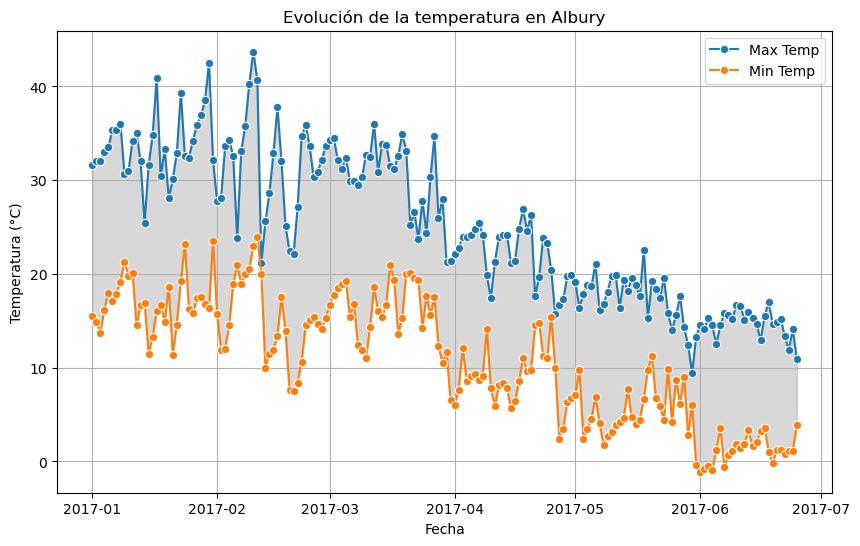

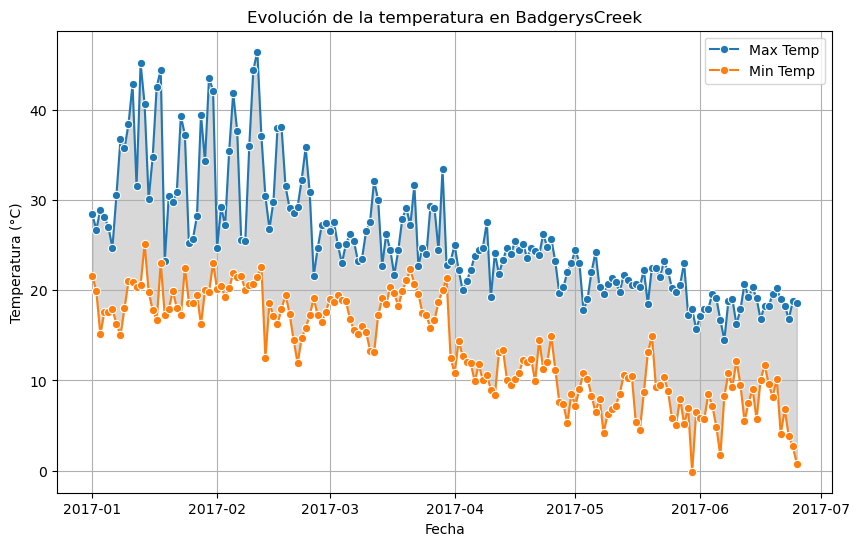

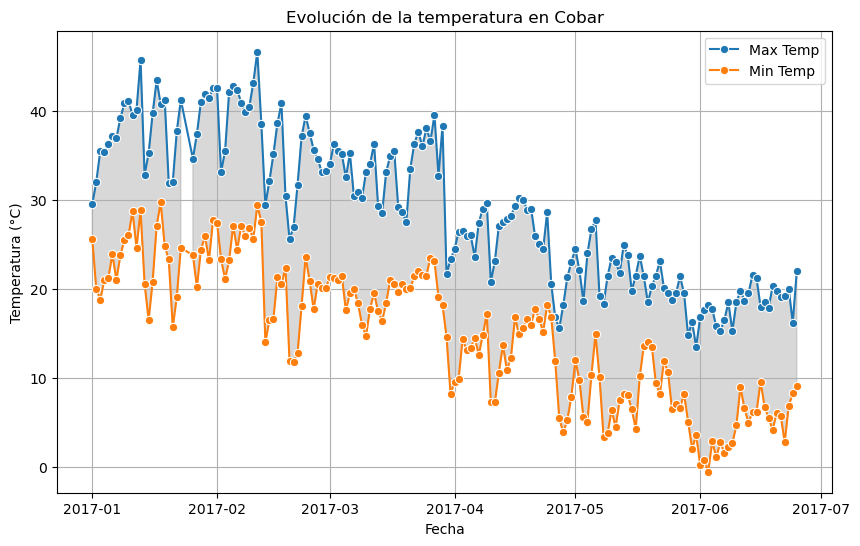

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Se define un intervalo arbitrario
start_date = '2017-01-01'
end_date = '2017-12-31'

# Se usan las primeras 3 ubicaciones
locations_to_plot = list(dfs_by_location.keys())[:3]

for location in locations_to_plot:
    location_df = dfs_by_location[location]
    
    plt.figure(figsize=(10, 6))
    
    # Se convierte la columna 'Date' a tipo datetime
    location_df['Date'] = pd.to_datetime(location_df['Date'])
    
    # Se ordena por fecha
    location_df = location_df.sort_values(by='Date')
    
    # Se filtra por el rango de fechas
    location_df = location_df[(location_df['Date'] >= start_date) & (location_df['Date'] <= end_date)]
    
    sns.lineplot(data=location_df, x='Date', y='MaxTemp', label='Max Temp', marker='o')
    sns.lineplot(data=location_df, x='Date', y='MinTemp', label='Min Temp', marker='o')

    # Se agrega sombreado para los valores medios de temperatura
    plt.fill_between(location_df['Date'], location_df['MinTemp'], location_df['MaxTemp'], color='gray', alpha=0.3)
    
    plt.title(f'Evolución de la temperatura en {location}')
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.grid(True)
    
    # Guardar la gráfica en un archivo
    # plt.savefig(f'{location}_temperature_evolution_seaborn.png')
    # plt.show()

También, nuevamente a modo de ejemplo, se incluye el gráfico de otras variables:

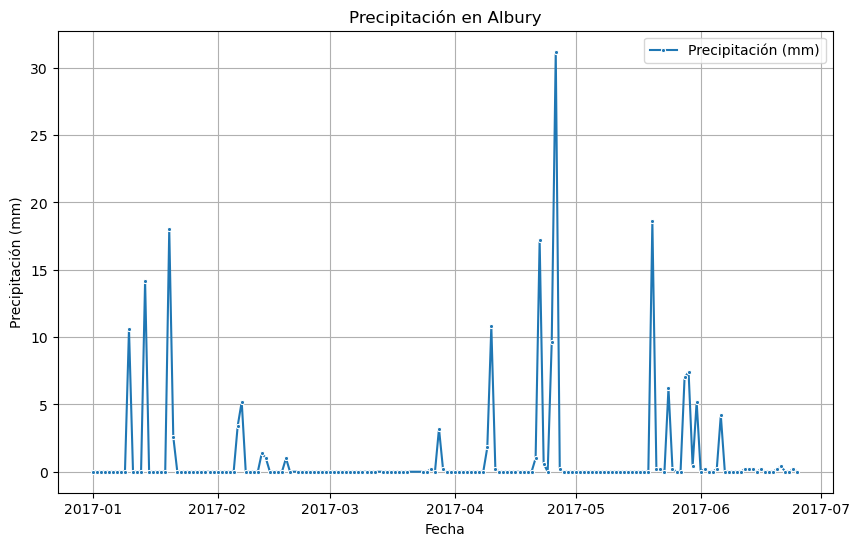

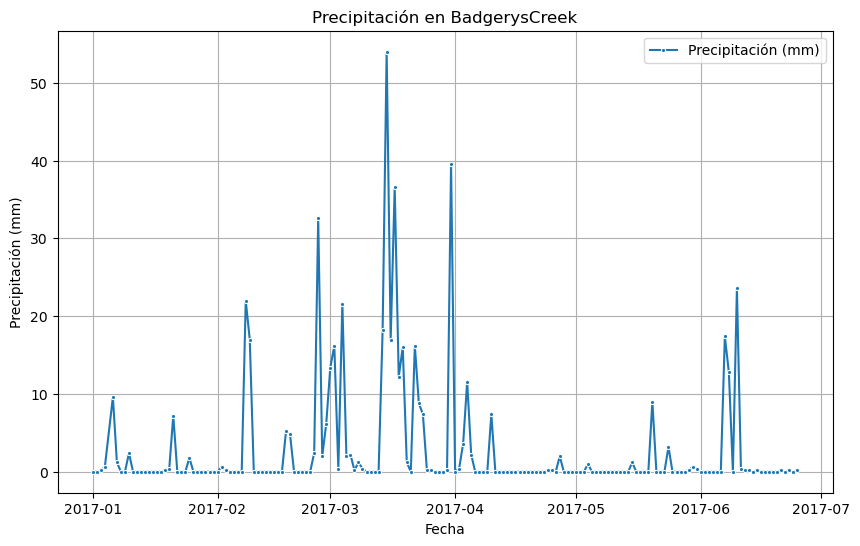

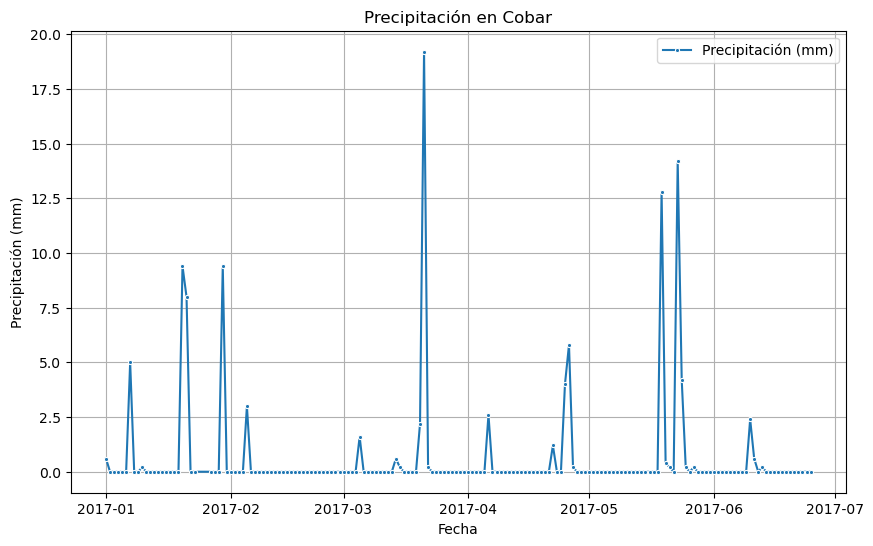

In [18]:
for location in locations_to_plot:
    location_df = dfs_by_location[location]
    
    plt.figure(figsize=(10, 6))
    
    # Se convierte la columna 'Date' a tipo datetime
    location_df['Date'] = pd.to_datetime(location_df['Date'])
    
    # Se ordena por fecha
    location_df = location_df.sort_values(by='Date')
    
    # Se filtra por el rango de fechas
    location_df = location_df[(location_df['Date'] >= start_date) & (location_df['Date'] <= end_date)]
    
    sns.lineplot(data=location_df, x='Date', y='Rainfall', label='Precipitación (mm)', marker='.')
    
    plt.title(f'Precipitación en {location}')
    plt.xlabel('Fecha')
    plt.ylabel('Precipitación (mm)')
    plt.legend()
    plt.grid(True)
    
    # Guardar la gráfica en un archivo
    # plt.savefig(f'{location}_temperature_evolution_seaborn.png')
    # plt.show()

Luego se pueden buscar distribuciones, tomando a Australia como objeto de estudio o cada locación por separado:

In [19]:
# Seleccionar las columnas numéricas relevantes para generar histogramas
columns_to_plot_histogram = [
    'MinTemp',          # Temperatura mínima
    'MaxTemp',          # Temperatura máxima
    'Rainfall',         # Precipitación
    'Evaporation',      # Evaporación
    'Sunshine',         # Horas de sol
    'WindGustSpeed',    # Velocidad máxima del viento
    'WindSpeed9am',     # Velocidad del viento a las 9AM
    'WindSpeed3pm',     # Velocidad del viento a las 3PM
    'Humidity9am',      # Humedad a las 9AM
    'Humidity3pm',      # Humedad a las 3PM
    'Pressure9am',      # Presión a las 9AM
    'Pressure3pm',      # Presión a las 3PM
    'Temp9am',          # Temperatura a las 9AM
    'Temp3pm'           # Temperatura a las 3PM
]

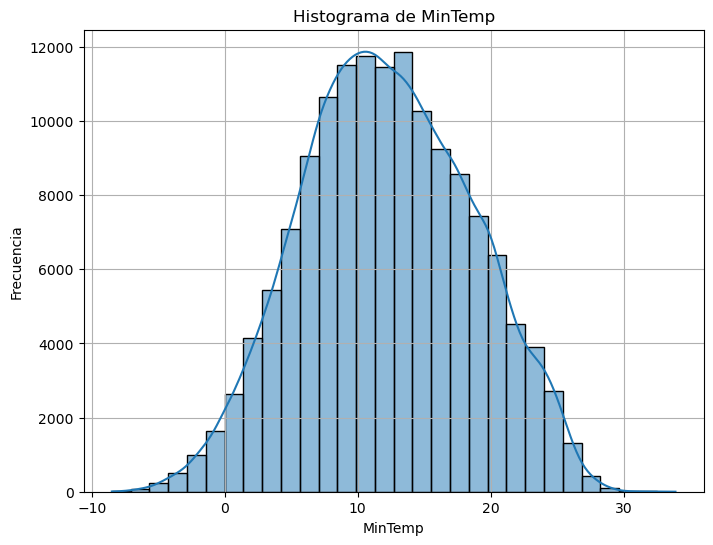

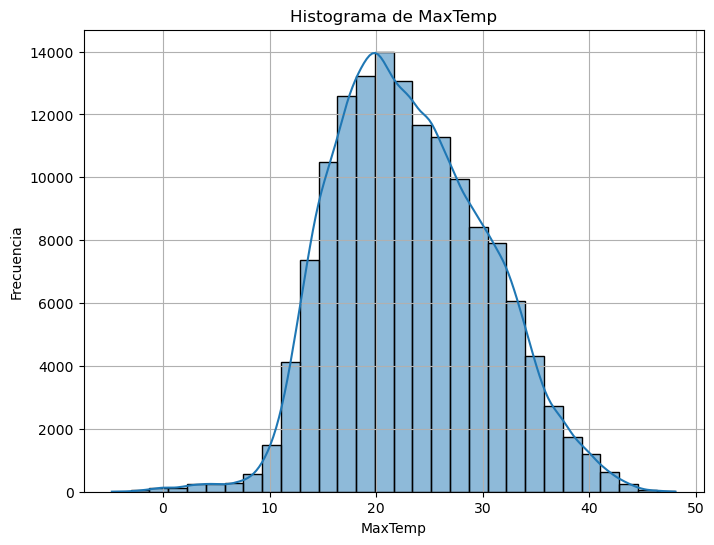

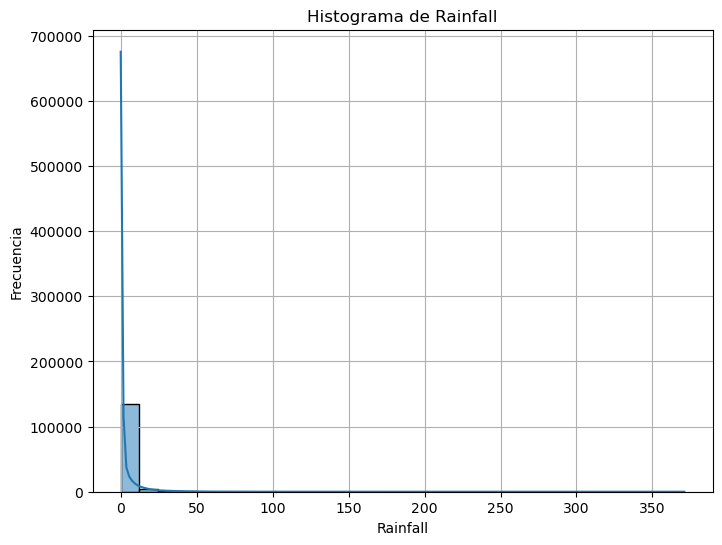

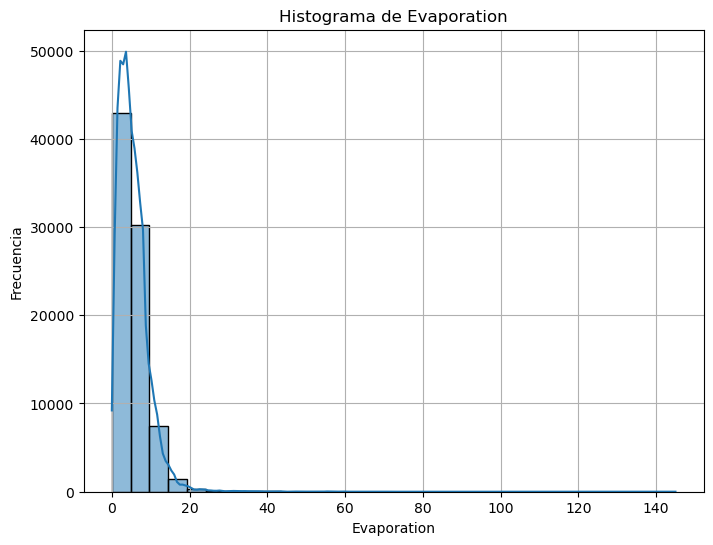

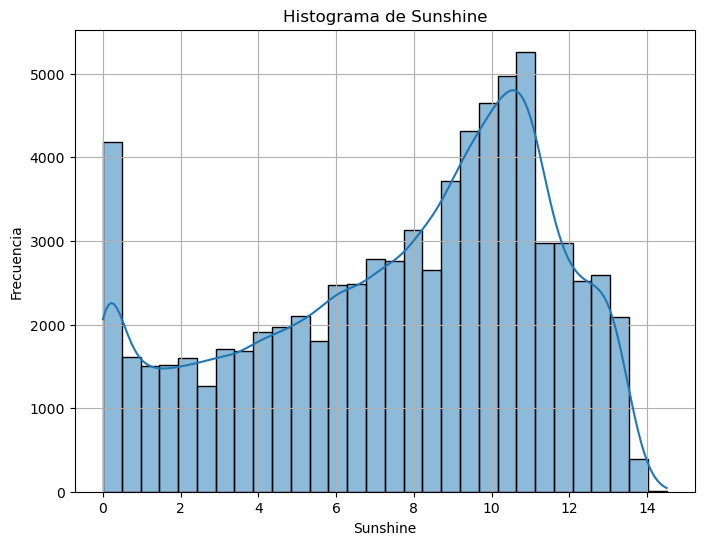

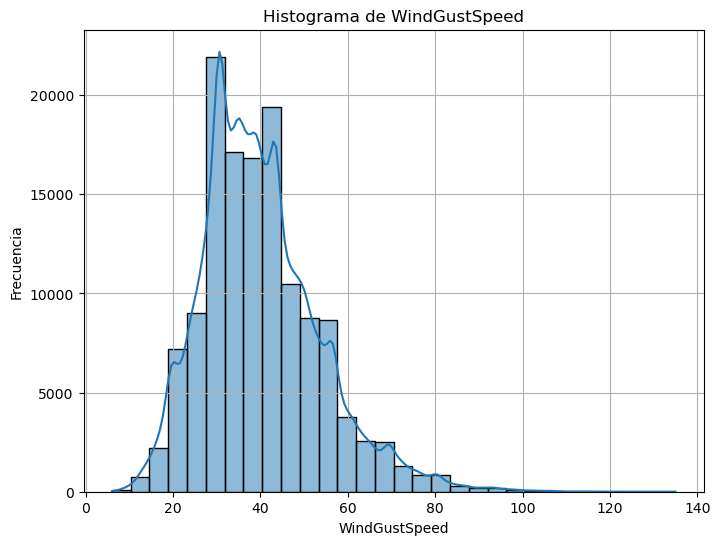

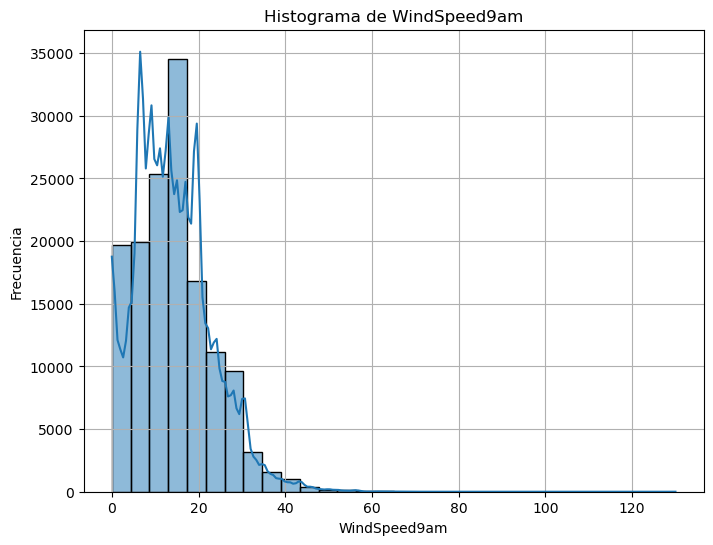

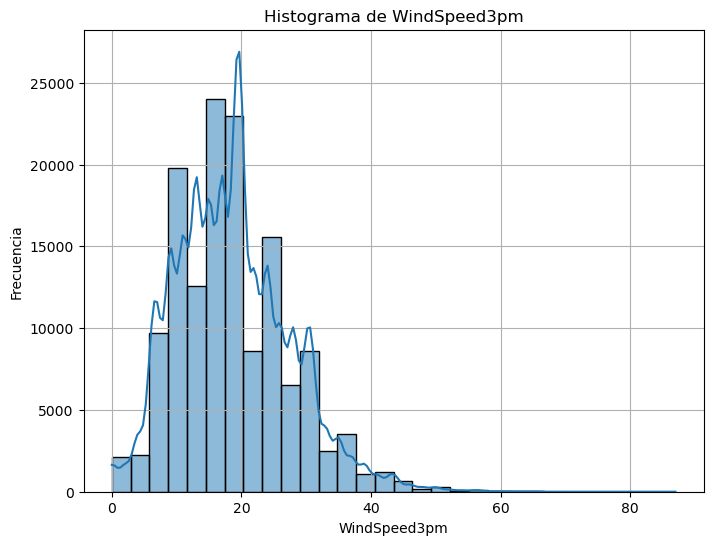

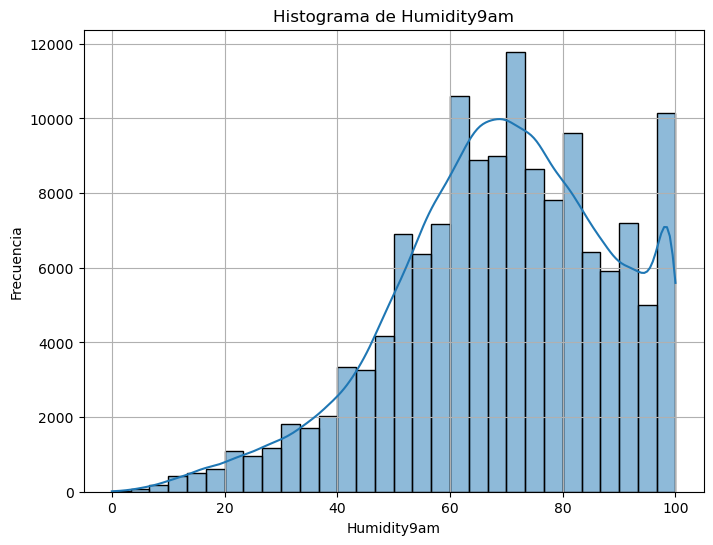

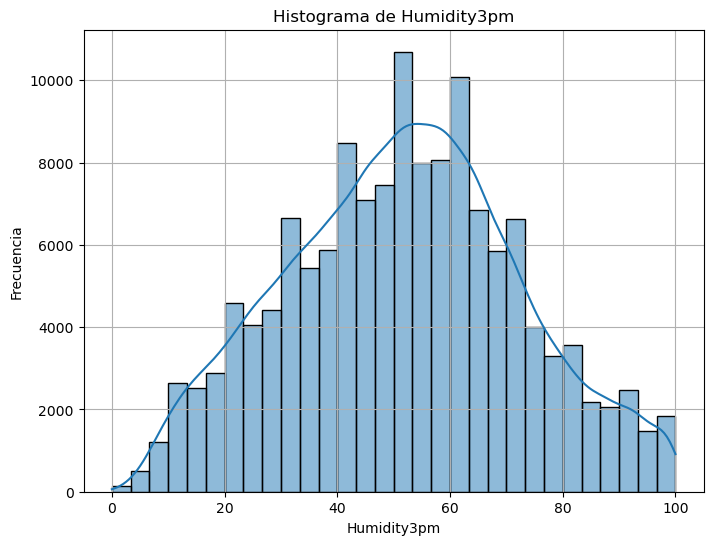

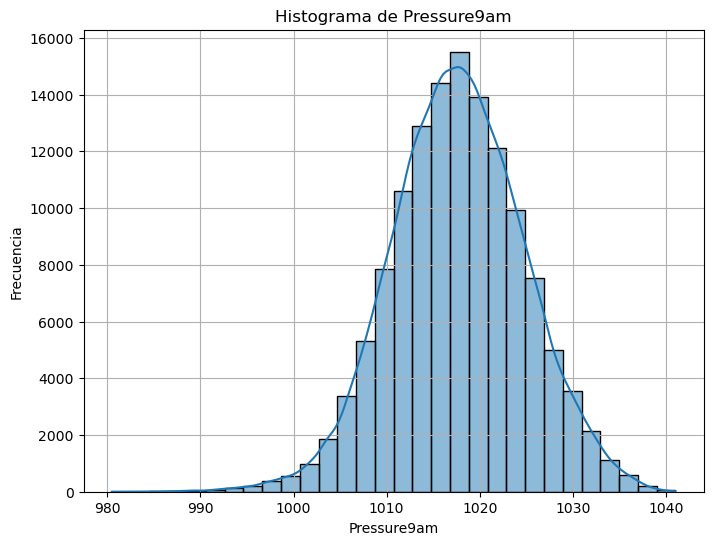

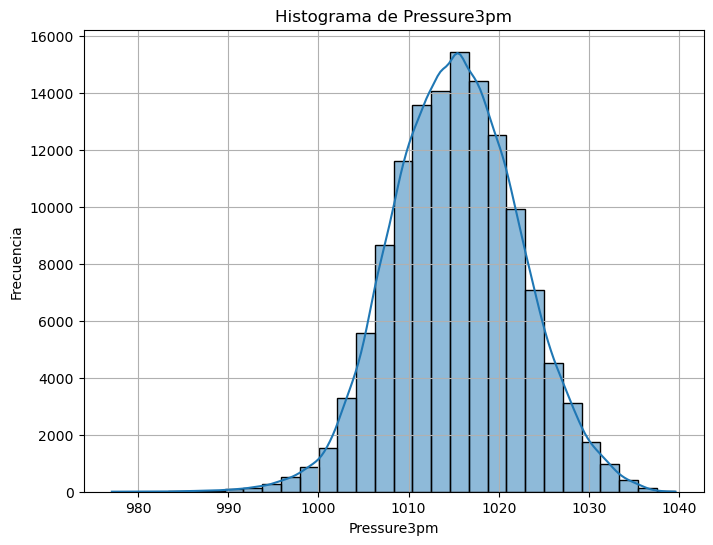

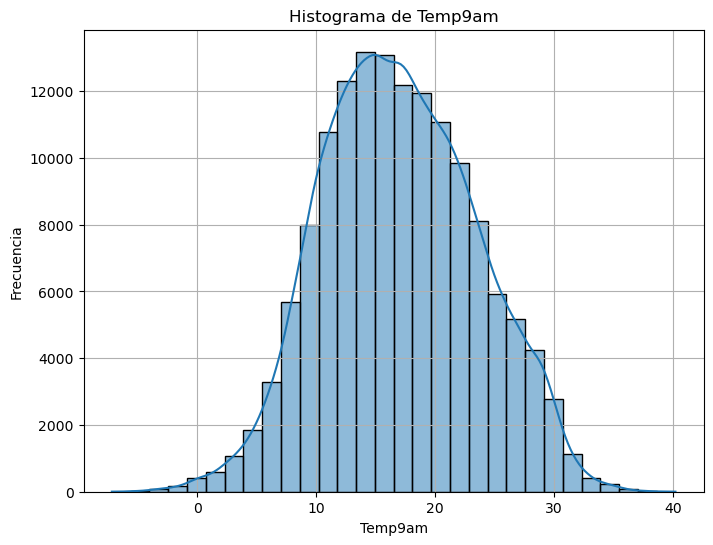

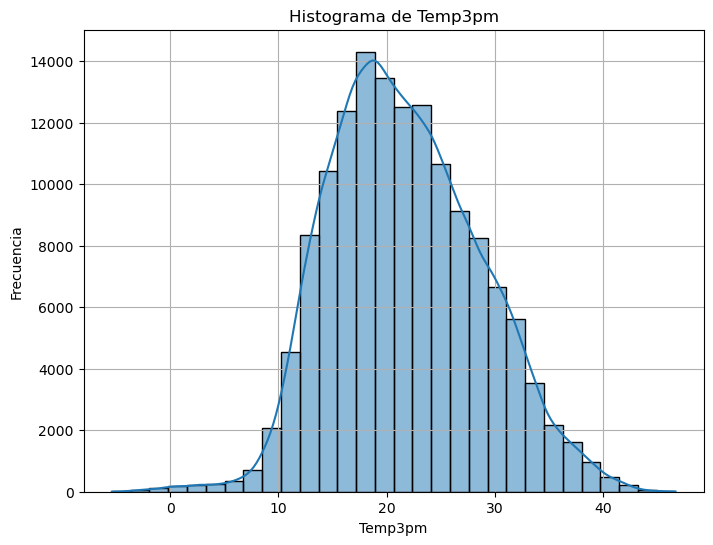

In [21]:
for column in columns_to_plot_histogram:
    plt.figure(figsize=(8, 6))
    
    if column in df.columns:
        data = df[column].dropna()
        
        if not data.empty:
            sns.histplot(data, bins=30, kde=True)  # kde=True para añadir la curva de densidad
            plt.title(f'Histograma de {column}')
            plt.xlabel(column)
            plt.ylabel('Frecuencia')
            plt.grid(True)
            plt.show()
        else:
            print(f"La columna {column} no tiene datos válidos para graficar.")
    else:
        print(f"La columna {column} no está presente en el DataFrame.")

A continuación se muestran los histogramas para Albury:

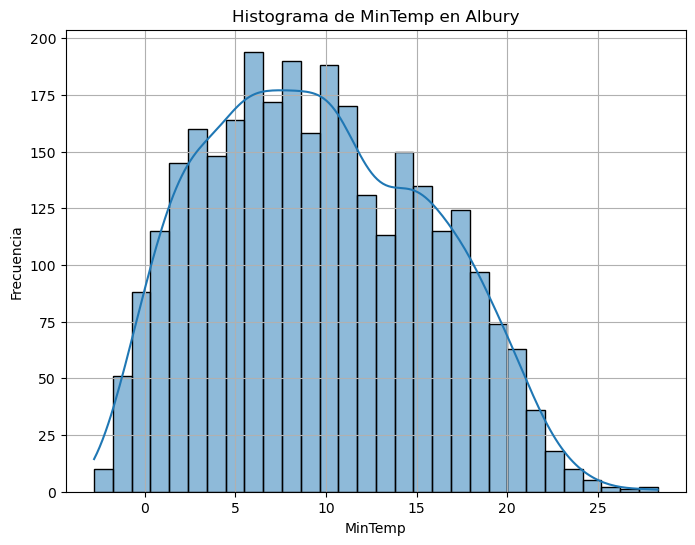

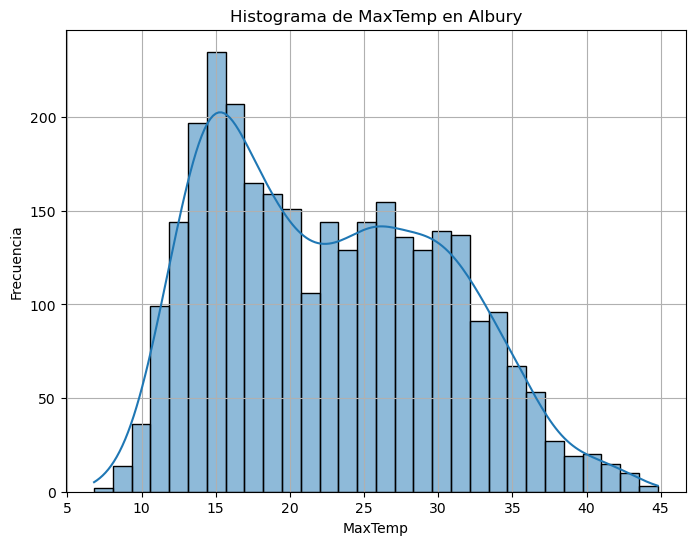

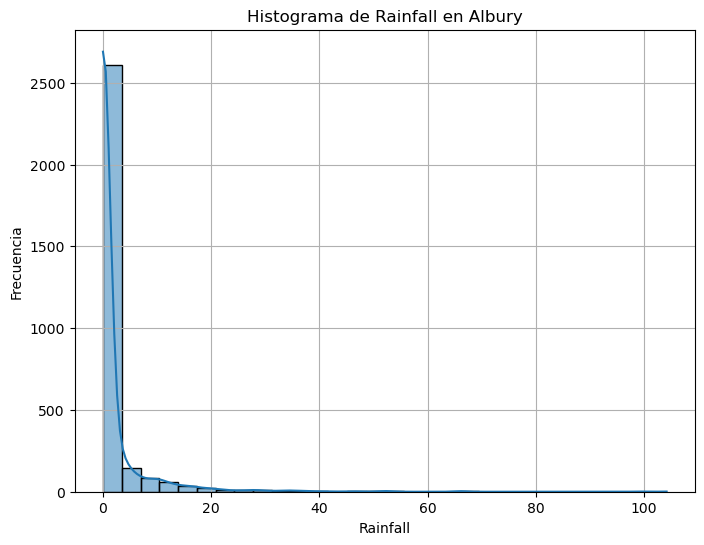

La columna Evaporation no tiene datos válidos para graficar.
La columna Sunshine no tiene datos válidos para graficar.


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

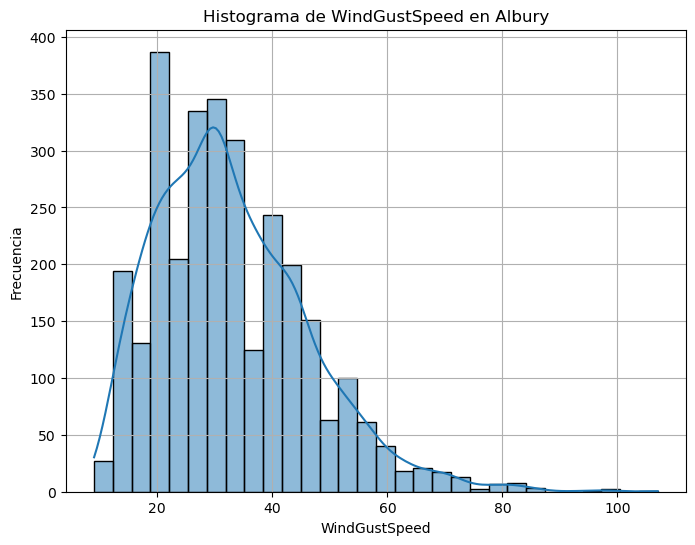

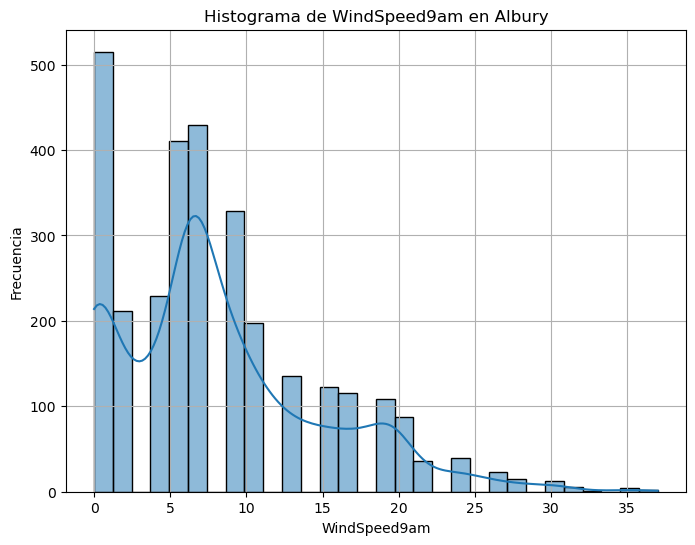

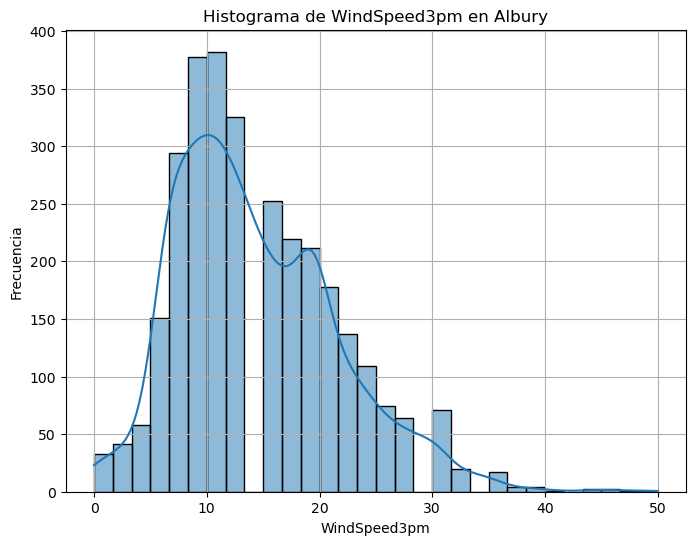

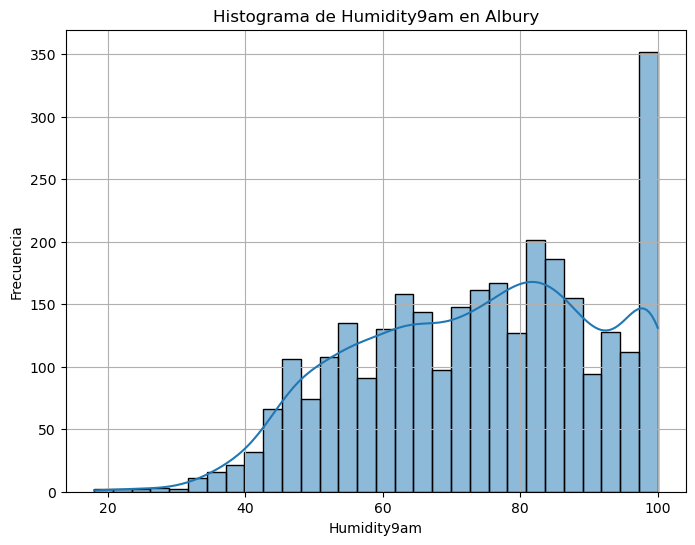

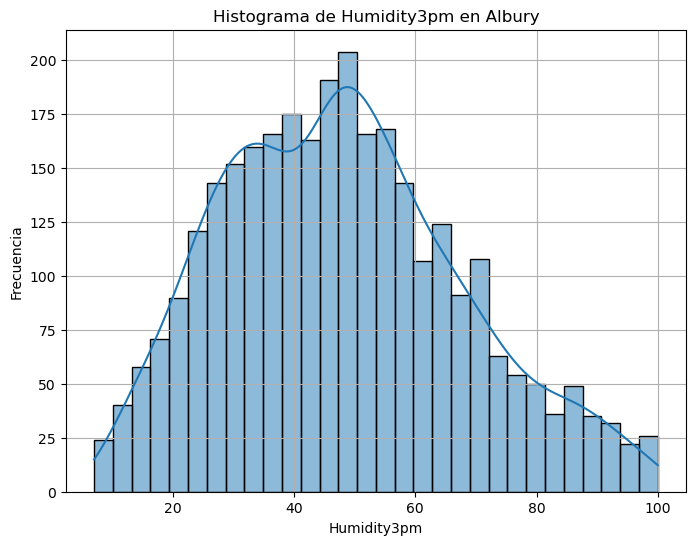

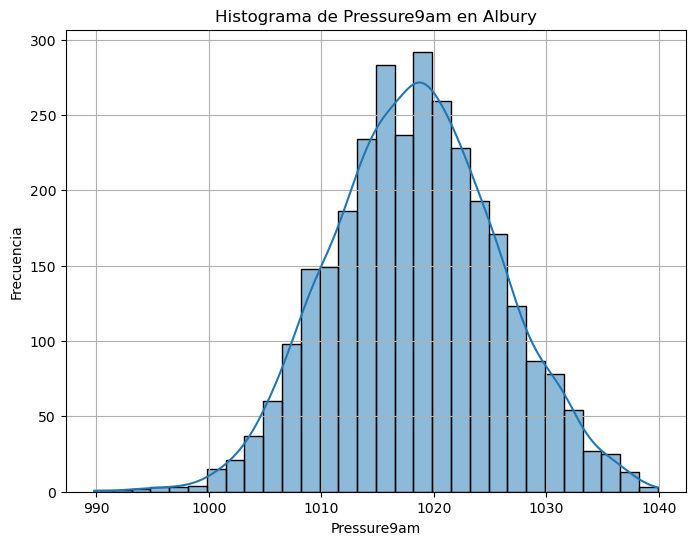

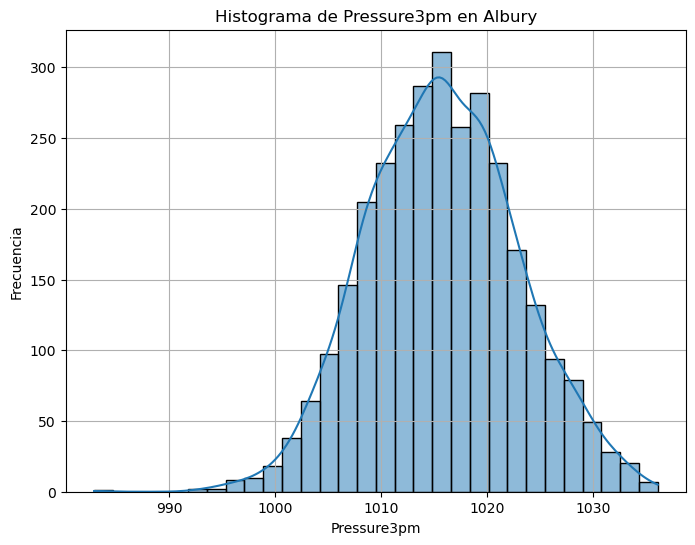

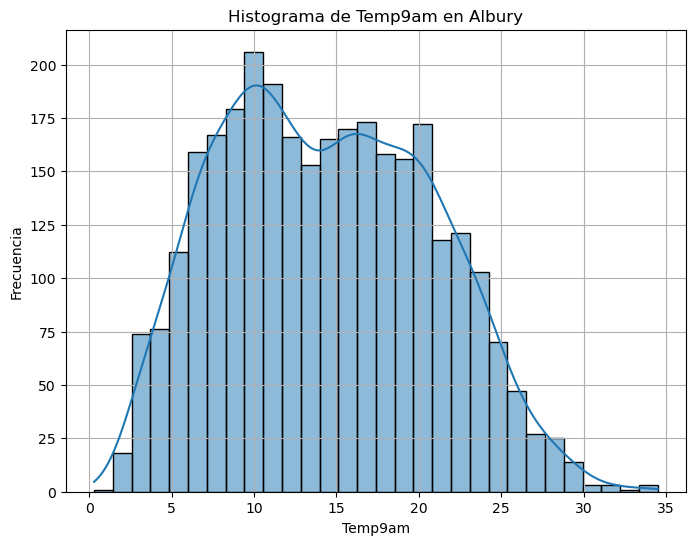

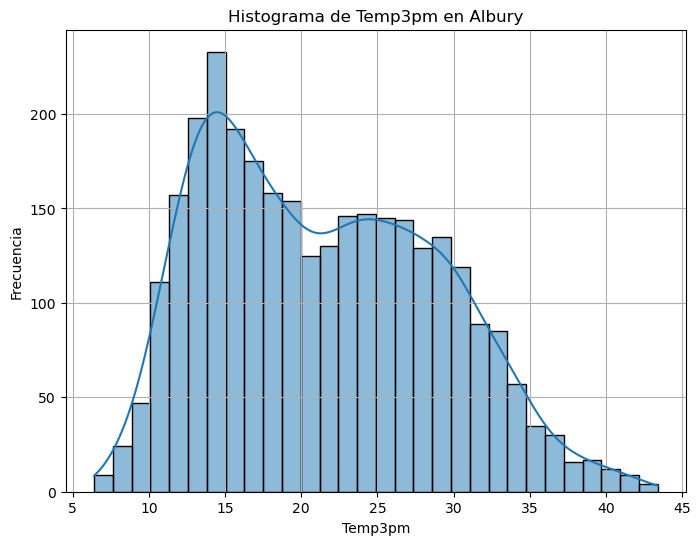

In [22]:
for column in columns_to_plot_histogram:
    plt.figure(figsize=(8, 6))
    
    if column in dfs_by_location['Albury'].columns:
        data = dfs_by_location['Albury'][column].dropna()
        
        if not data.empty:
            sns.histplot(data, bins=30, kde=True)  # kde=True para añadir la curva de densidad
            plt.title(f'Histograma de {column} en Albury')
            plt.xlabel(column)
            plt.ylabel('Frecuencia')
            plt.grid(True)
            plt.show()
        else:
            print(f"La columna {column} no tiene datos válidos para graficar.")
    else:
        print(f"La columna {column} no está presente en el DataFrame.")

Se puede observar a continuación, que algunos features son categóricos. Otros, son numéricos (enteros) pero como las posibilidades son limitadas, resulta más práctico realizar un conteo de los mismos.

In [23]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [24]:
df['Cloud9am'].unique()

array([ 8., nan,  7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.,  9.])

In [25]:
df['Cloud3pm'].unique()

array([nan,  2.,  8.,  7.,  1.,  5.,  4.,  6.,  3.,  0.,  9.])

In [26]:
df['WindSpeed9am'].unique()

array([ 20.,   4.,  19.,  11.,   7.,   6.,  15.,  17.,  28.,  24.,  nan,
         9.,   0.,  13.,   2.,  26.,  30.,  22.,  35.,  37.,  31.,  33.,
        48.,  39.,  44.,  43.,  41.,  46.,  56.,  83.,  74.,  52.,  65.,
        50., 130.,  54.,  61.,  57.,  59.,  87.,  67.,  63.,  69.,  72.])

In [27]:
# Lista de columnas categóricas (incluyendo 'Cloud9am' y 'Cloud3pm')
columns_to_plot_countplot = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Cloud9am', 'Cloud3pm']

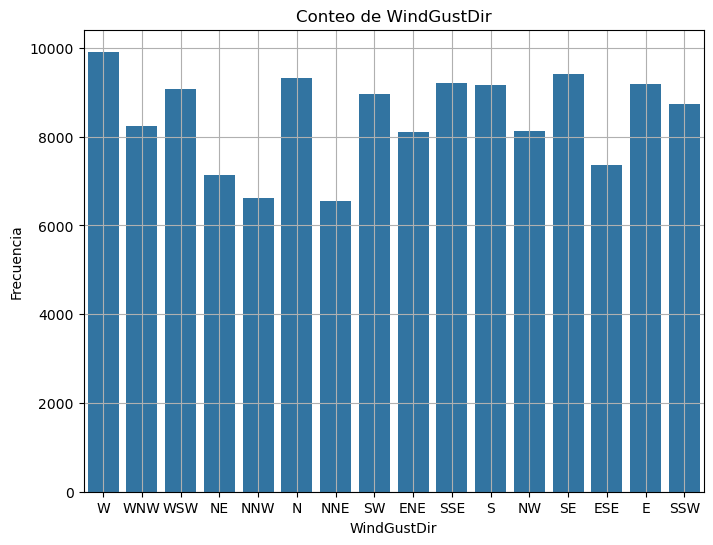

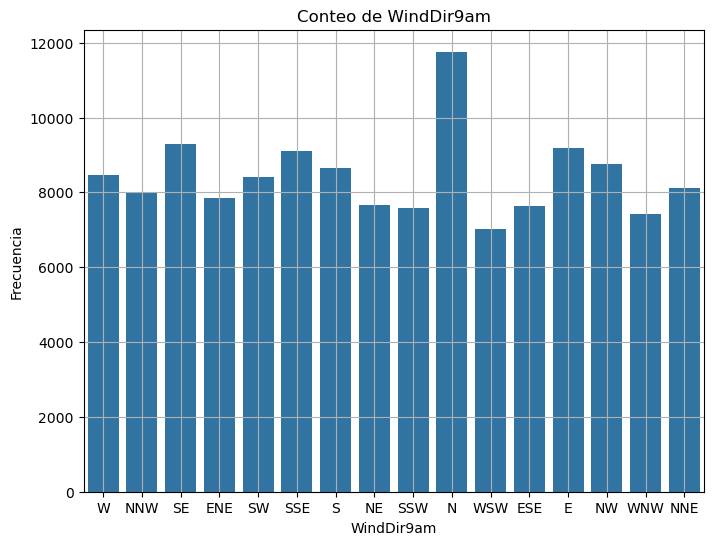

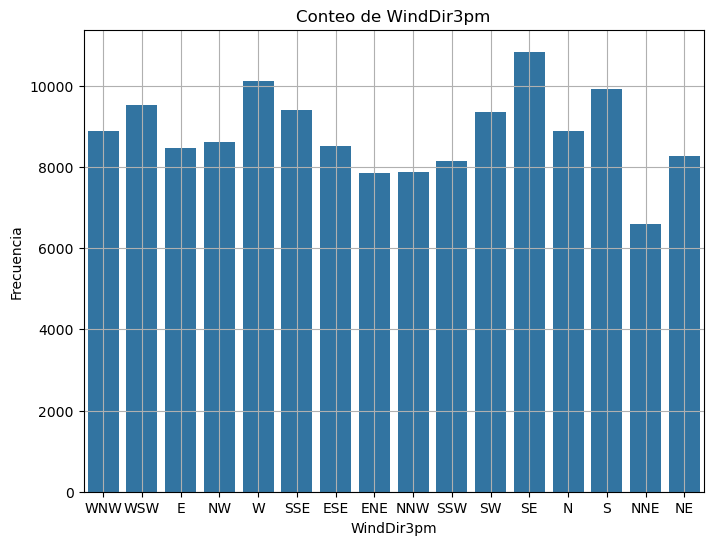

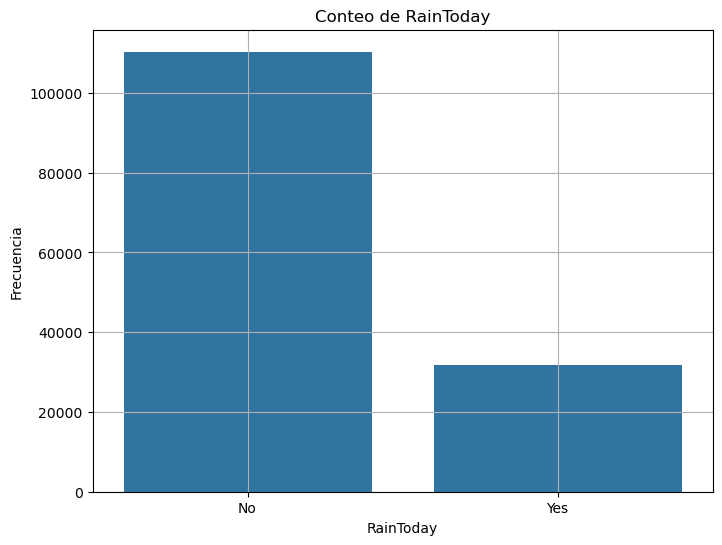

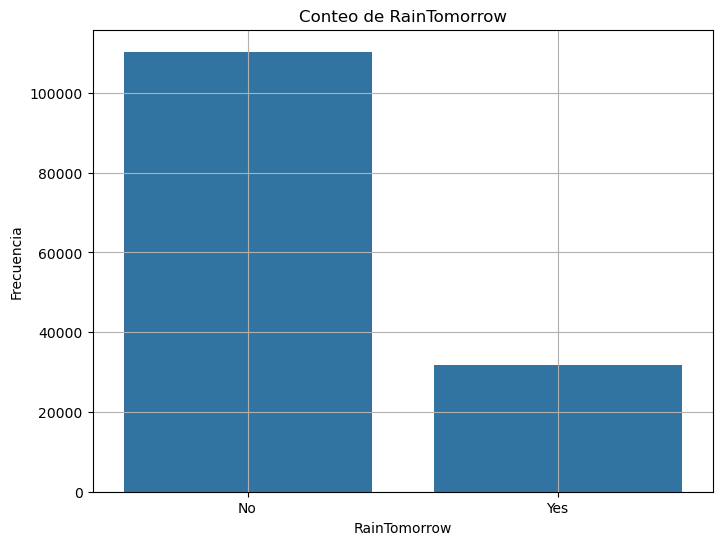

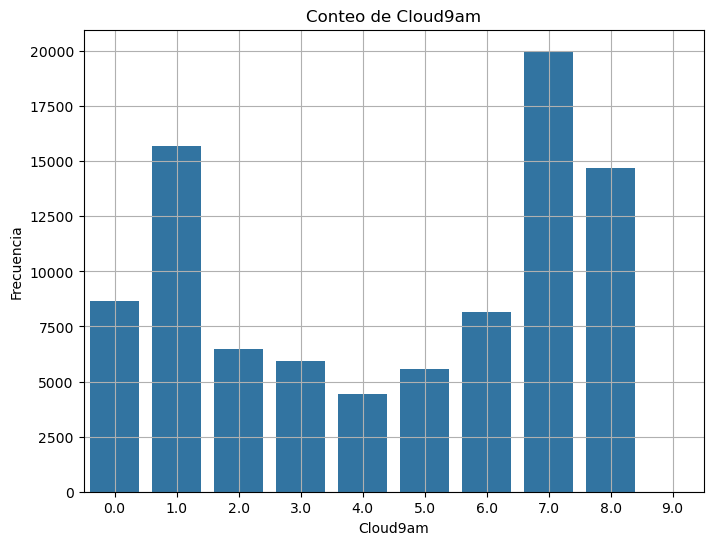

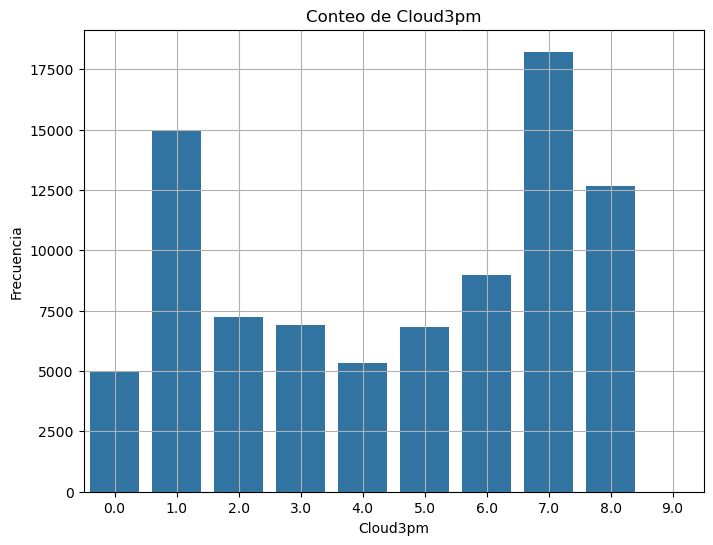

In [28]:
for column in columns_to_plot_countplot:
    plt.figure(figsize=(8, 6))
    
    if column in df.columns:
        sns.countplot(x=df[column].dropna())
        plt.title(f'Conteo de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()
    else:
        print(f"La columna {column} no está presente en el DataFrame.")

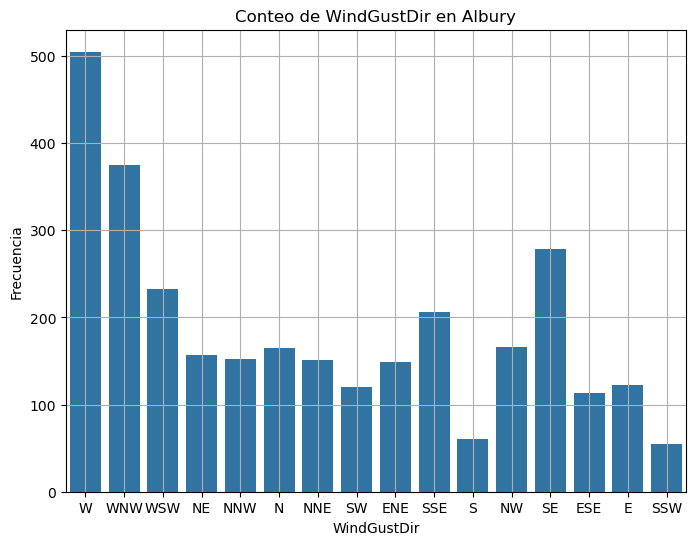

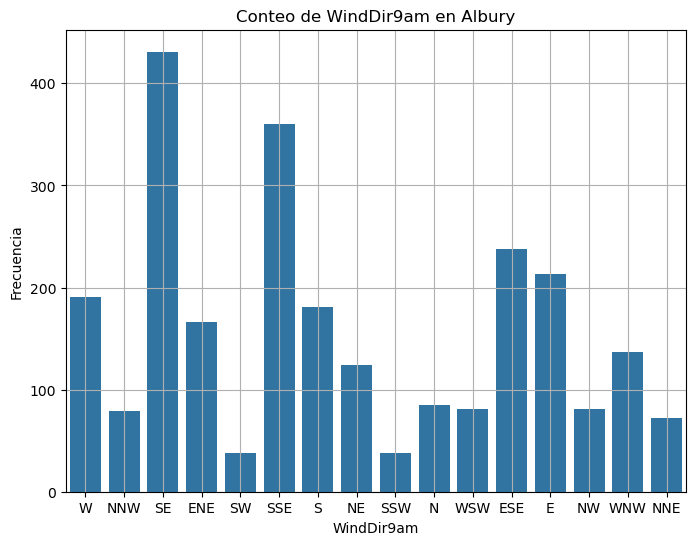

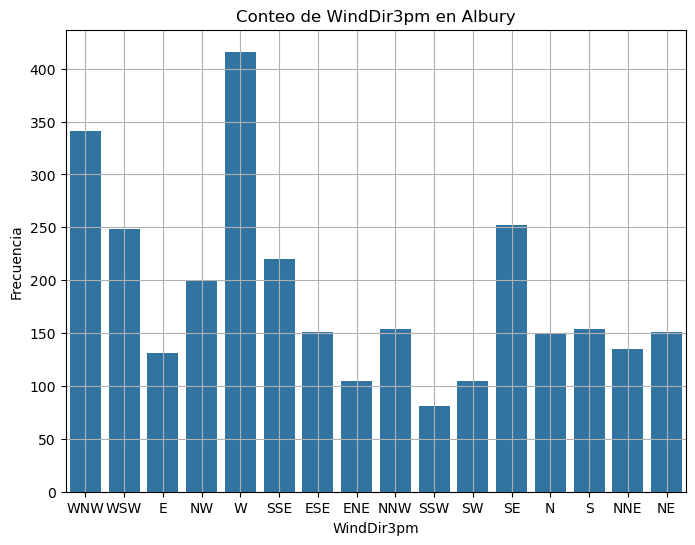

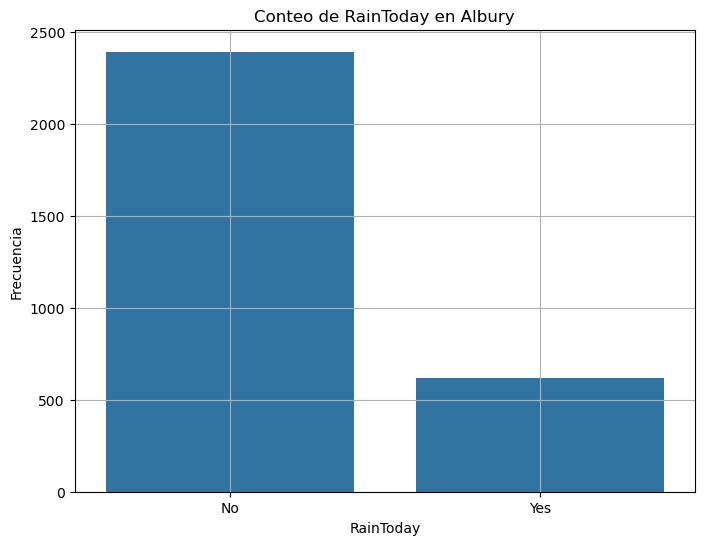

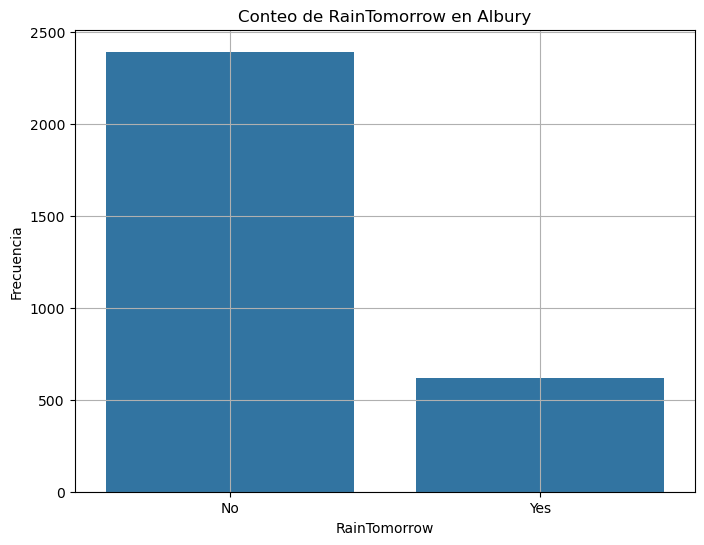

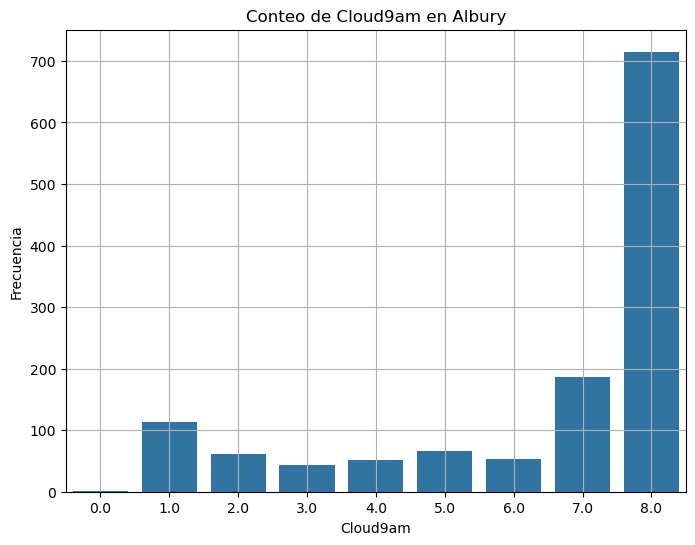

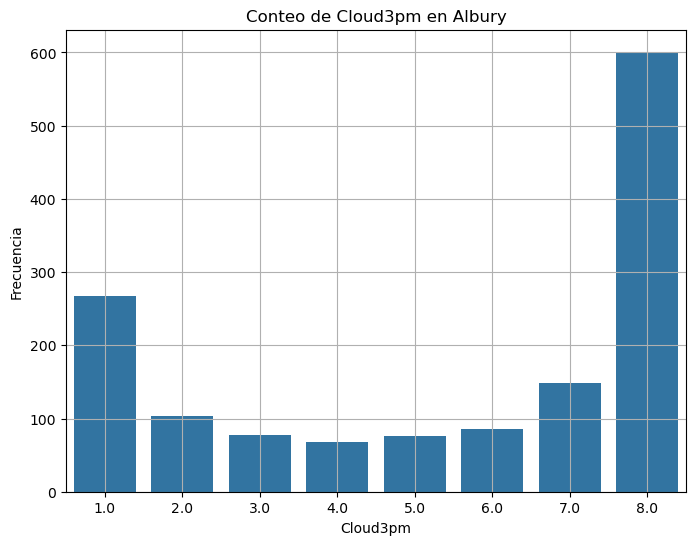

In [29]:
for column in columns_to_plot_countplot:
    plt.figure(figsize=(8, 6))
    
    if column in dfs_by_location['Albury'].columns:
        sns.countplot(x=dfs_by_location['Albury'][column].dropna())
        plt.title(f'Conteo de {column} en Albury')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()
    else:
        print(f"La columna {column} no está presente en el DataFrame.")

Hasta el momento no se ha tenido en cuenta las relaciones entre variables. A continuación se proponen algunas de aquellas relaciones posibles a analizar:

### MaxTemp vs. Sunshine:

La cantidad de horas de sol debería influir directamente en la temperatura máxima registrada en el día.

### Humidity3pm vs. RainTomorrow:

La humedad es un buen indicador de si va a llover. Altos niveles de humedad en la tarde podrían ser un predictor de lluvia al día siguiente.

### WindGustSpeed vs. Rainfall:

Las ráfagas de viento fuertes a menudo están asociadas con condiciones meteorológicas inestables, como tormentas.

### Pressure3pm vs. RainTomorrow:

La presión atmosférica baja es frecuentemente un indicador de mal tiempo. 

### Cloud9am vs. Temp9am:

Los días nublados suelen ser más frescos por la mañana debido a la menor radiación solar.

### Evaporation vs. Sunshine:

La evaporación está directamente influenciada por la radiación solar.

### WindSpeed9am vs. WindSpeed3pm:

Comparar la velocidad del viento en dos momentos del día podría revelar patrones diarios en la intensidad del viento, lo cual es útil para predecir tendencias a lo largo del día.

### Rainfall vs. RainTomorrow:

Puedes evaluar si la cantidad de lluvia caída hoy influye en la probabilidad de lluvia mañana.

### Temp9am vs. MaxTemp:

La temperatura a las 9 AM puede ser un buen predictor de la temperatura máxima del día. Esto puede ser útil para pronósticos de corto plazo basados en datos tempranos.


## MaxTemp vs. Sunshine

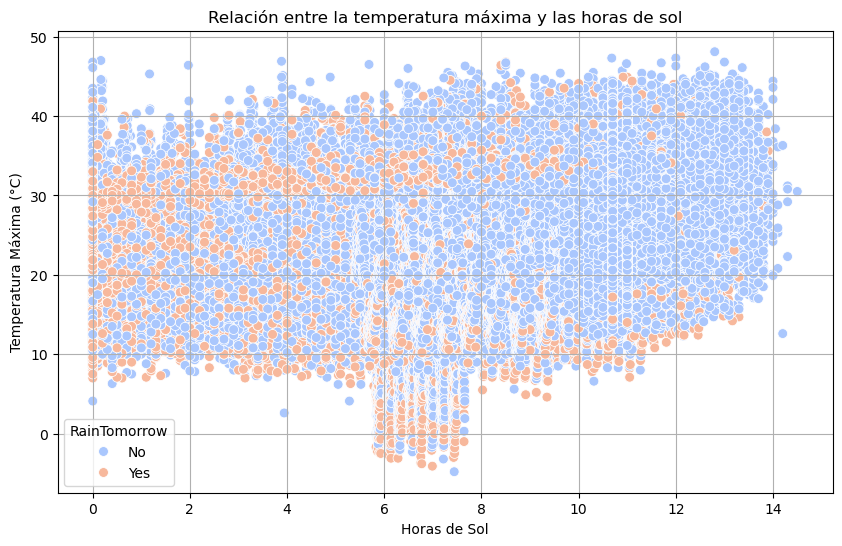

In [30]:
df_copy = df.copy()

df_copy['MaxTemp'] = df_copy['MaxTemp'].interpolate(method='linear')
df_copy['Sunshine'] = df_copy['Sunshine'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['MaxTemp', 'Sunshine'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='Sunshine', y='MaxTemp', hue='RainTomorrow', palette='coolwarm', s=50)
plt.title('Relación entre la temperatura máxima y las horas de sol')
plt.xlabel('Horas de Sol')
plt.ylabel('Temperatura Máxima (°C)')
plt.grid(True)
plt.show()

A juzgar por los resultados, parecería no haber una relación marcada entre ambas variables. Por otro lado, las Horas de sol parecerían tener más incidencia que la temperatura máxima con respecto a si lloverá al día siguiente.

## Humidity3pm vs. RainTomorrow

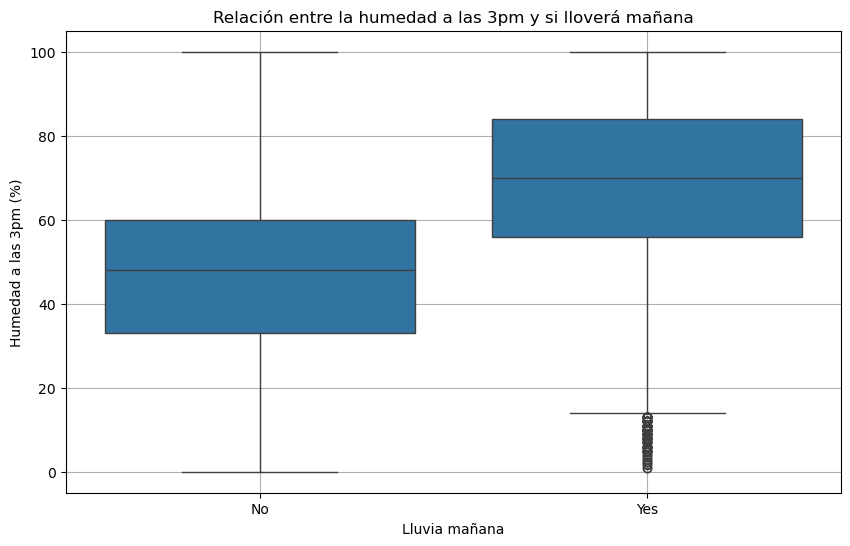

In [34]:
df_copy = df.copy()

df_copy['Humidity3pm'] = df_copy['Humidity3pm'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Humidity3pm', 'RainTomorrow'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='RainTomorrow', y='Humidity3pm')
plt.title('Relación entre la humedad a las 3pm y si lloverá mañana')
plt.xlabel('Lluvia mañana')
plt.ylabel('Humedad a las 3pm (%)')
plt.grid(True)
plt.show()

Aquí se observa una fuerte relación entre la humedad a las 3pm y el hecho de que precipite al otro día:

- Para los días en que lloverá al día siguiente, el rango intercuartil (IQR) de la humedad a las 3pm está aproximadamente entre 60% y 80%, lo que significa que el 50% central de los datos de humedad se encuentra en ese rango.
- Para los días en que no lloverá al día siguiente, el IQR de la humedad a las 3pm está aproximadamente entre 35% y 60%, lo que indica que el 50% central de la humedad en esos días tiene una humedad más baja.

### WindGustSpeed vs. Rainfall

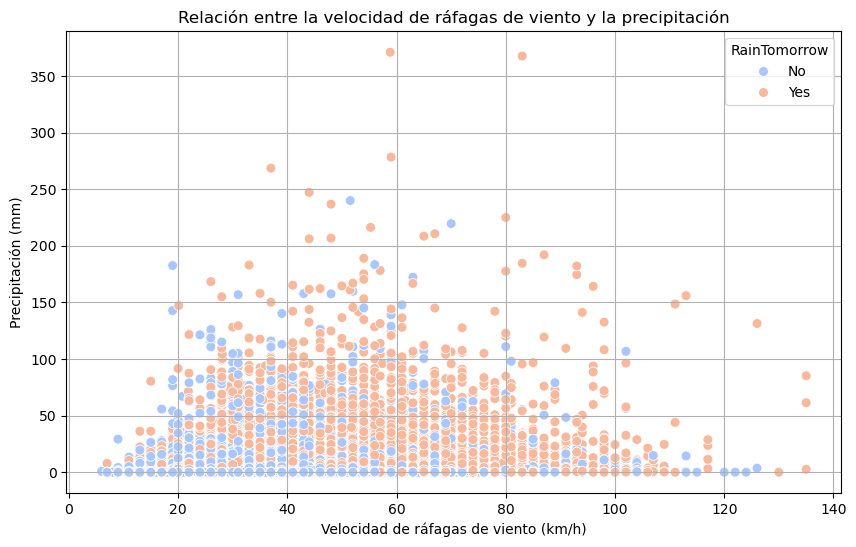

In [36]:
df_copy = df.copy()

df_copy['WindGustSpeed'] = df_copy['WindGustSpeed'].interpolate(method='linear')
df_copy['Rainfall'] = df_copy['Rainfall'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['WindGustSpeed', 'Rainfall'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='WindGustSpeed', y='Rainfall', hue='RainTomorrow', palette='coolwarm', s=50)
plt.title('Relación entre la velocidad de ráfagas de viento y la precipitación')
plt.xlabel('Velocidad de ráfagas de viento (km/h)')
plt.ylabel('Precipitación (mm)')
plt.grid(True)
plt.show()

Aquí se observa que cuanto más crecen ambas variables, hay mayores chances de que precipite al día siguiente. Por otro lado, no se observa dependencia entre variables.

## Pressure9am vs. RainTomorrow

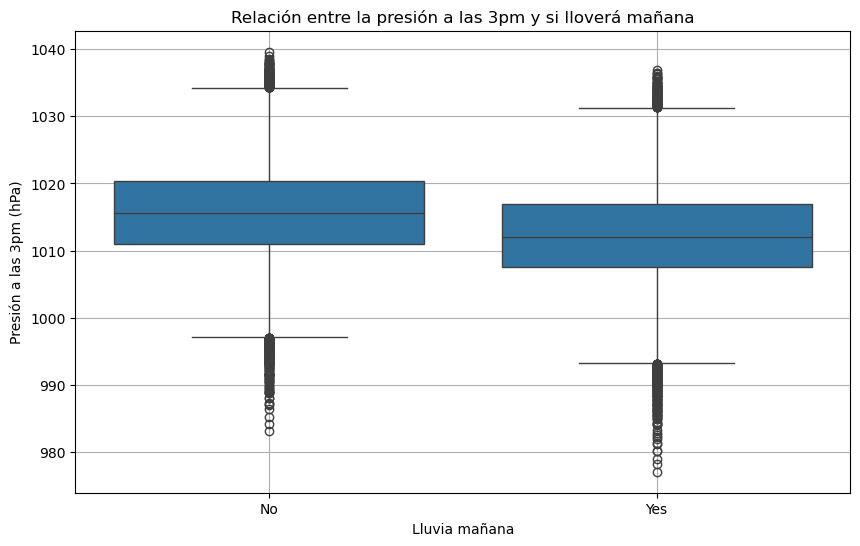

In [38]:
df_copy = df.copy()

df_copy['Pressure3pm'] = df_copy['Pressure3pm'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Pressure3pm', 'RainTomorrow'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='RainTomorrow', y='Pressure3pm')
plt.title('Relación entre la presión a las 3pm y si lloverá mañana')
plt.xlabel('Lluvia mañana')
plt.ylabel('Presión a las 3pm (hPa)')
plt.grid(True)
plt.show()


Debido a que existe una fuerte superposición de los rangos intercuartiles (IQR), la presión a las 3pm no parece ser un buen indicador. 

## Cloud9am vs. Temp9am

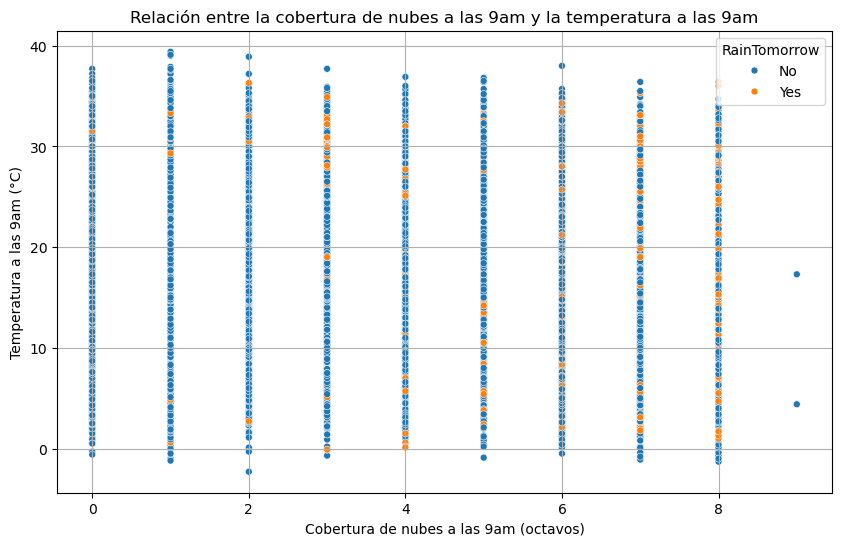

In [42]:
df_copy = df.copy()

df_copy['Temp9am'] = df_copy['Temp9am'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Cloud9am', 'Temp9am'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='Cloud9am', y='Temp9am', hue='RainTomorrow', s=25)
plt.title('Relación entre la cobertura de nubes a las 9am y la temperatura a las 9am')
plt.xlabel('Cobertura de nubes a las 9am (octavos)')
plt.ylabel('Temperatura a las 9am (°C)')
plt.grid(True)
plt.show()

Se observa que la cobertura de nubes por la mañana suele ser un buen indicador de que al día siguiente no lloverá cuando el valor es 0.

Se procede también a visualizar qué pasa luego a las 3pm para ver si existe mayor información una vez avanzado el día:

## Cloud3pm vs. Temp3pm

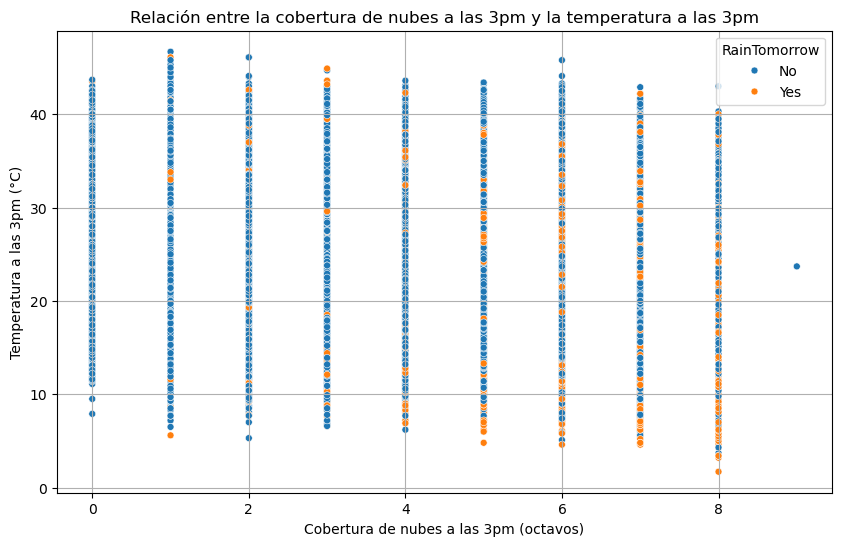

In [44]:
df_copy = df.copy()

df_copy['Temp3pm'] = df_copy['Temp3pm'].interpolate(method='linear')

df_copy = df_copy.dropna(subset=['Cloud3pm', 'Temp3pm'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='Cloud3pm', y='Temp3pm', hue='RainTomorrow', s=25)
plt.title('Relación entre la cobertura de nubes a las 3pm y la temperatura a las 3pm')
plt.xlabel('Cobertura de nubes a las 3pm (octavos)')
plt.ylabel('Temperatura a las 3pm (°C)')
plt.grid(True)
plt.show()

Aquí se puede observar que cuando la cobertura de nubes a las 3pm es grande, y la temperatura es baja, hay alta probabilidad de lluvia al día siguiente.